In [1]:
import fastreg.testing as frt
import fastreg.formula as frf
import fastreg.linear as frl
from fastreg.formula import I, R, C

In [2]:
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [3]:
data = frt.dataset(N=100_000, models=['linear', 'poisson'])
data

,id1,id2,x1,x2,yhat0,yhat,yhat1,y0,y,Ep0,Ep,Ep1,p0,p,p1
0,E,37,-0.259664,0.957506,0.596604,1.366604,0.996604,0.140456,3.450027,1.815941,3.922009,2.709066,1,0,4
1,I,65,0.334285,-1.045791,-0.427189,1.022811,0.372811,-0.551597,0.954923,0.652340,2.781001,1.451810,2,1,1
2,I,10,0.067322,-0.631068,-0.258444,0.641556,0.541556,-0.682874,1.517074,0.772252,1.899434,1.718679,0,4,1
3,I,10,0.384297,0.485393,0.506525,1.406525,1.306525,-0.236097,3.559011,1.659514,4.081746,3.693317,3,2,5
4,G,38,-1.584996,-1.037097,-0.997757,-0.017757,-0.397757,-1.692442,-2.045029,0.368706,0.982400,0.671825,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,D,73,0.624556,0.857360,0.801783,1.831783,1.101783,-0.951971,2.520384,2.229513,6.245012,3.009527,2,5,6
99996,D,53,2.040068,-0.346070,0.504379,1.334379,0.804379,0.245231,0.334883,1.655956,3.797635,2.235307,2,5,2
99997,J,40,0.423945,0.758248,0.682132,1.982132,1.582132,-1.915105,1.672198,1.978091,7.258203,4.865319,3,7,6
99998,D,90,-0.232874,-0.372146,-0.193150,1.006850,0.106850,-0.774781,0.737252,0.824358,2.736966,1.112767,0,2,2


### Interfaces

In [6]:
frl.ols(y='y', x=I+R('x1')+R('x2')+C('id1')+C('id2'), data=data)

y,coeff,stderr,low95,high95,pvalue
1,0.152789,0.033121,0.087873,0.217705,3.968445e-06
x1,0.295420,0.003172,0.289203,0.301637,0.000000e+00
x2,0.593774,0.003153,0.587595,0.599954,0.000000e+00
id1=B,0.071617,0.014167,0.043850,0.099384,4.298797e-07
id1=C,0.167662,0.014115,0.139997,0.195327,0.000000e+00
...,...,...,...,...,...
id2=95,0.863448,0.044494,0.776242,0.950654,0.000000e+00
id2=96,0.950444,0.045121,0.862008,1.038879,0.000000e+00
id2=97,0.961423,0.044398,0.874405,1.048441,0.000000e+00
id2=98,0.978801,0.044968,0.890666,1.066936,0.000000e+00


In [7]:
form = 'y ~ 1 + x1 + x2 + C(id1) + C(id2)'
frl.ols(formula=form, data=data)

y,coeff,stderr,low95,high95,pvalue
1,0.152789,0.033121,0.087873,0.217705,3.968445e-06
x1,0.295420,0.003172,0.289203,0.301637,0.000000e+00
x2,0.593774,0.003153,0.587595,0.599954,0.000000e+00
id1=B,0.071617,0.014167,0.043850,0.099384,4.298797e-07
id1=C,0.167662,0.014115,0.139997,0.195327,0.000000e+00
...,...,...,...,...,...
id2=95,0.863448,0.044494,0.776242,0.950654,0.000000e+00
id2=96,0.950444,0.045121,0.862008,1.038879,0.000000e+00
id2=97,0.961423,0.044398,0.874405,1.048441,0.000000e+00
id2=98,0.978801,0.044968,0.890666,1.066936,0.000000e+00


In [8]:
frl.ols(y='y', x=['1', 'x1', 'x2', C('id1'), C('id2')], data=data)

y,coeff,stderr,low95,high95,pvalue
1,0.152789,0.033121,0.087873,0.217705,3.968445e-06
x1,0.295420,0.003172,0.289203,0.301637,0.000000e+00
x2,0.593774,0.003153,0.587595,0.599954,0.000000e+00
id1=B,0.071617,0.014167,0.043850,0.099384,4.298797e-07
id1=C,0.167662,0.014115,0.139997,0.195327,0.000000e+00
...,...,...,...,...,...
id2=95,0.863448,0.044494,0.776242,0.950654,0.000000e+00
id2=96,0.950444,0.045121,0.862008,1.038879,0.000000e+00
id2=97,0.961423,0.044398,0.874405,1.048441,0.000000e+00
id2=98,0.978801,0.044968,0.890666,1.066936,0.000000e+00


### Extras

In [9]:
frl.ols(y='y', x=I+R('x1')+R('x2'), absorb=C('id1')*C('id2'), data=data)

y,coeff,stderr,low95,high95,pvalue
1,1.049263,0.002852,1.043674,1.054853,0.0
x1,0.295420,0.003129,0.289287,0.301553,0.0
x2,0.593774,0.003251,0.587402,0.600146,0.0


In [10]:
frl.ols(y='y', x=I+R('x1')+R('x2')+C('id1')+C('id2'), cluster=C('id1')*C('id2'), data=data)

y,coeff,stderr,low95,high95,pvalue
1,0.152789,0.027124,0.099627,0.205951,1.771259e-08
x1,0.295420,0.003129,0.289287,0.301553,0.000000e+00
x2,0.593774,0.003251,0.587402,0.600147,0.000000e+00
id1=B,0.071617,0.011754,0.048580,0.094655,1.108260e-09
id1=C,0.167662,0.012462,0.143238,0.192086,0.000000e+00
...,...,...,...,...,...
id2=95,0.863448,0.038707,0.787583,0.939313,0.000000e+00
id2=96,0.950444,0.036558,0.878791,1.022096,0.000000e+00
id2=97,0.961423,0.043568,0.876032,1.046814,0.000000e+00
id2=98,0.978801,0.036580,0.907106,1.050496,0.000000e+00


### Accuracy

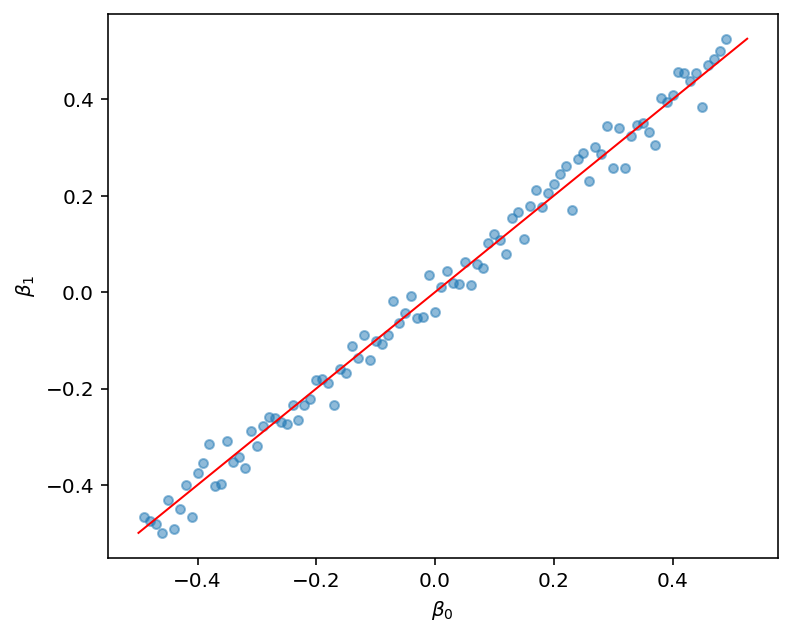

In [11]:
frt.test_ols(data, plot=True);

[  0] 0.1570: 0.1884 0.1832
[  1] 1.4284: 0.2962 0.2784
[  2] 2.0323: 0.3724 0.3258
[  3] 2.3189: 0.4154 0.3301
[  4] 2.4544: 0.4397 0.3138
[  5] 2.5105: 0.4558 0.2933
[  6] 2.5270: 0.4626 0.2809
[  7] 2.5299: 0.4638 0.2769
[  8] 2.5300: 0.4616 0.2750
[  9] 2.5298: 0.4581 0.2732


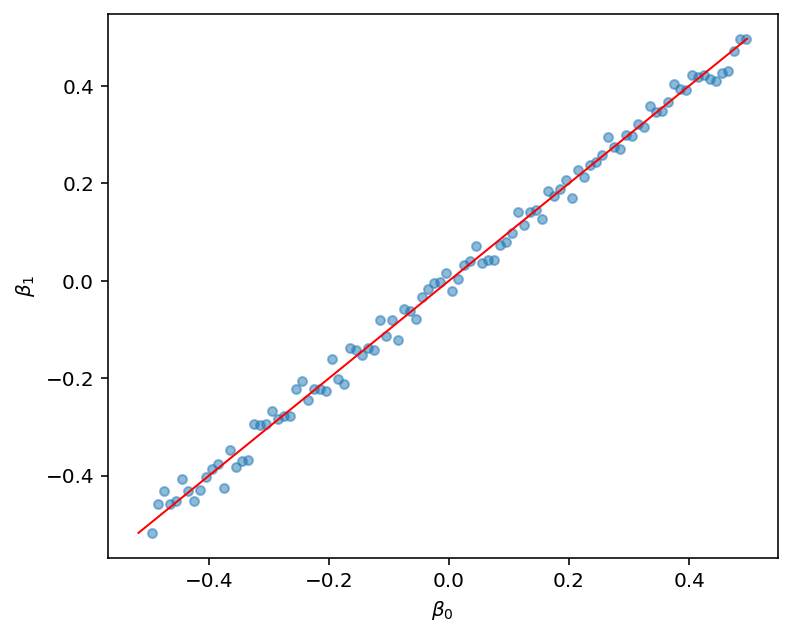

In [14]:
frt.test_glm(data, plot=True);